In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [5]:
import sys

In [6]:
sys.path

['/Users/verakocetkova/Desktop/Data Science/ComputerVision/notebooks',
 '/Users/verakocetkova/.conda/envs/ComputerVision/lib/python310.zip',
 '/Users/verakocetkova/.conda/envs/ComputerVision/lib/python3.10',
 '/Users/verakocetkova/.conda/envs/ComputerVision/lib/python3.10/lib-dynload',
 '',
 '/Users/verakocetkova/.conda/envs/ComputerVision/lib/python3.10/site-packages']

In [7]:
sys.path.append('../')

In [8]:
from src.utils import find_homo
from src.pansharp import brovey_transform, intensity_transform

In [9]:
def cv2_load2rgb(path):
    img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
    return img

In [10]:
gray_img = cv2.imread("../image_processing_task1/GRAY.JPG", cv2.IMREAD_UNCHANGED)

In [11]:
gray_img.shape

(741, 1363)

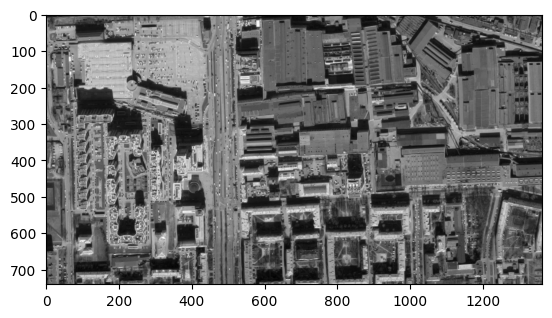

In [12]:
plt.imshow(gray_img, "gray");

In [13]:
rgb_half = cv2_load2rgb("../image_processing_task1/RGB_half.JPG")

In [14]:
rgb_half.shape

(343, 630, 3)

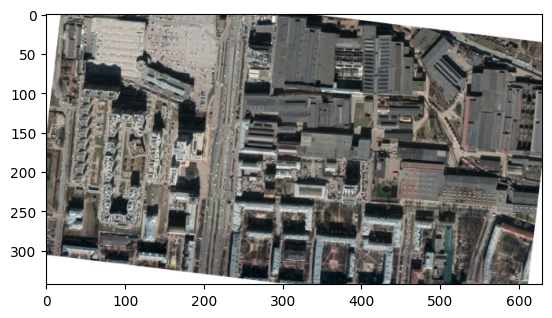

In [15]:
plt.imshow(rgb_half);

In [16]:
rgb_quater = cv2_load2rgb("../image_processing_task1/RGB_quater.JPG")

In [17]:
rgb_quater.shape

(207, 380, 3)

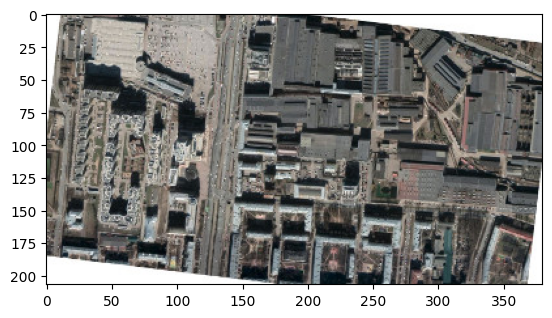

In [18]:
plt.imshow(rgb_quater);

# Pan sharpening

## Feature Matching + Homography to find Objects

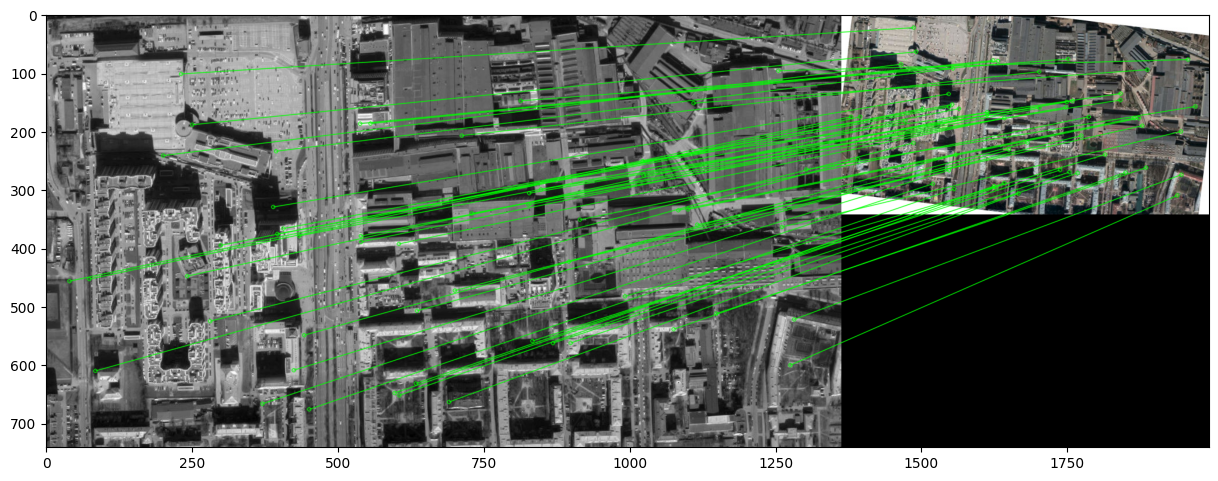

In [19]:
matrix = find_homo(gray_img, rgb_half, limit_dist=0.12, draw_subset=True)

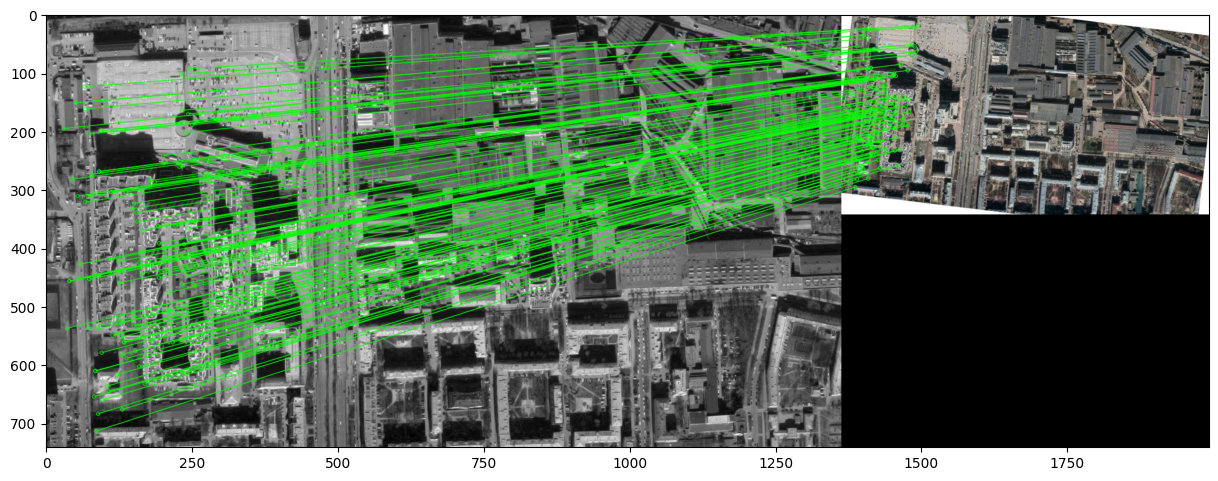

In [20]:
matrix = find_homo(gray_img, rgb_half, limit_dist=0.2, draw_subset=True)

### Transforming

In [21]:
h, w = gray_img.shape

In [22]:
rgb_half.shape[:2]

(343, 630)

In [23]:
rgb_half_tranf = cv2.warpPerspective(rgb_half, matrix, (w,h), flags=cv2.WARP_INVERSE_MAP)

In [24]:
rgb_half_tranf.shape

(741, 1363, 3)

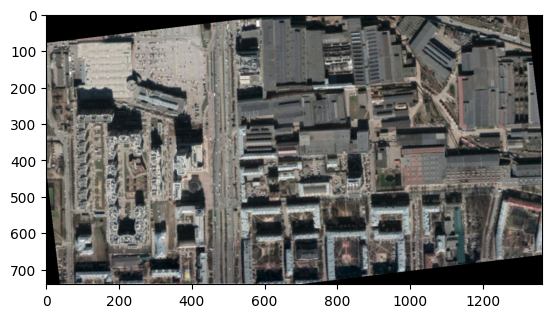

In [25]:
plt.imshow(rgb_half_tranf);

Transformation - success!

## transforming second image

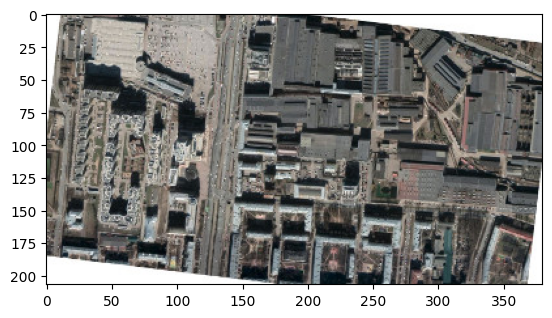

In [26]:
plt.imshow(rgb_quater)

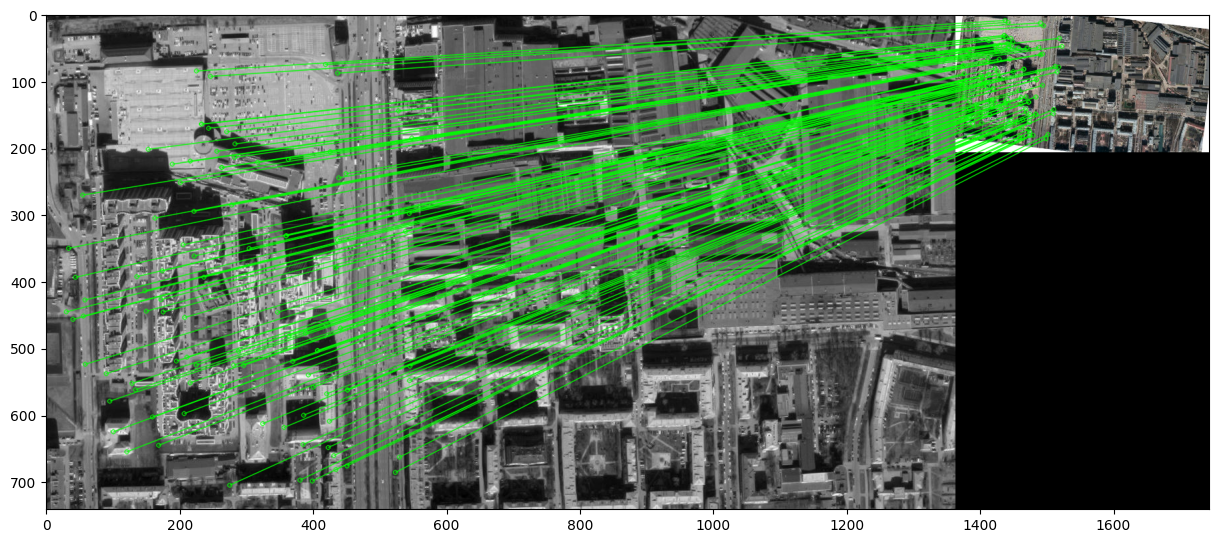

In [27]:
matrix_2 = find_homo(gray_img, rgb_quater, limit_dist=0.3, draw_subset=True)

In [28]:
rgb_quater_tranf = cv2.warpPerspective(rgb_quater, matrix_2, (w,h), flags=cv2.WARP_INVERSE_MAP)

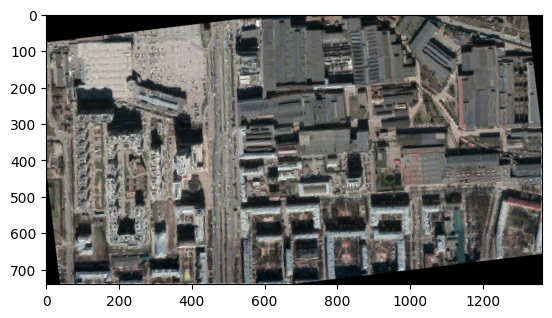

In [29]:
plt.imshow(rgb_quater_tranf);

I have tranformed all colored images using Homography.
Now I need to restore color information 

# Restore color information 

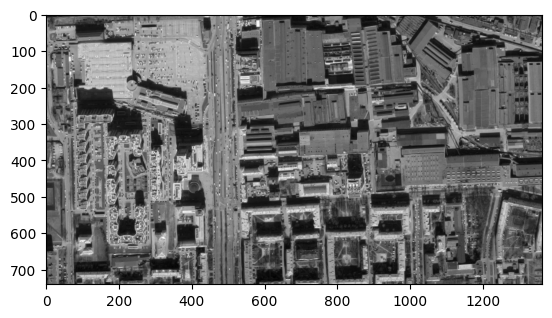

In [30]:
plt.imshow(gray_img, "gray");

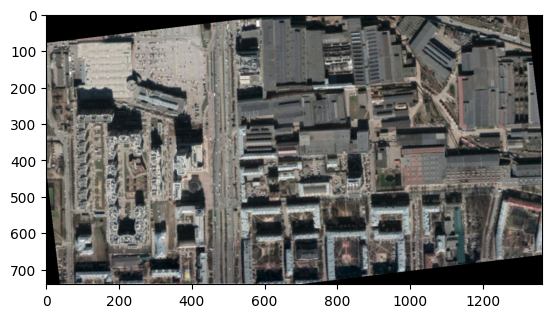

In [31]:
plt.imshow(rgb_half_tranf);

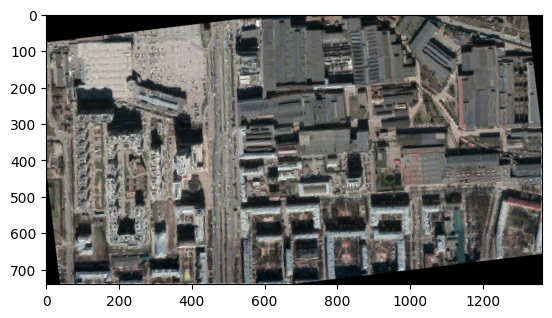

In [32]:
plt.imshow(rgb_quater_tranf);

## HSV using intensity

In [33]:
gray_half = intensity_transform(rgb_half_tranf, gray_img)

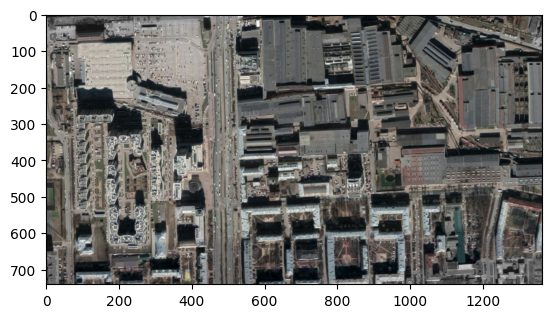

In [34]:
plt.imshow(gray_half)

For comparison - it worked

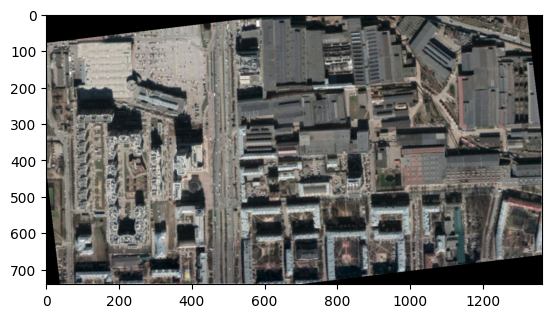

In [35]:
plt.imshow(rgb_half_tranf)

### Let's use second image

In [36]:
gray_quater = intensity_transform(rgb_quater_tranf, gray_img)

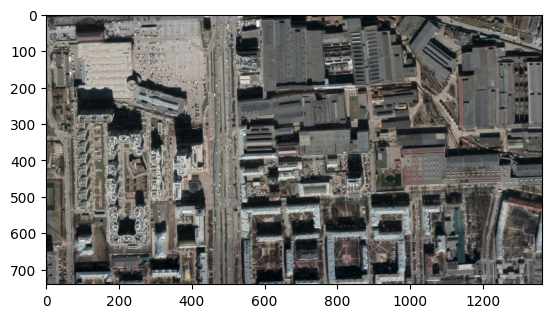

In [37]:
plt.imshow(gray_quater)

It's also worked!

## brovey

In [48]:
from src.utils import find_homo
from src.pansharp import brovey_transform, intensity_transform

$$ Red_{out} = \frac{Pan}{1/3(blue_{in} + green_{in} + red_{in})} *  R_{in} $$

In [39]:
rgb_half_tranf.shape

(741, 1363, 3)

In [43]:
b, g, r = cv2.split(rgb_half_tranf)

In [45]:
const = gray_img / ((r + g + b)/3)

/var/folders/p8/bmd8tl011hg8pnsxb1z09wqh0000gn/T/ipykernel_40181/3010287174.py:1: RuntimeWarning: divide by zero encountered in divide
  const = gray_img / ((r + g + b)/3)


In [47]:
r.shape

(741, 1363)

In [46]:
(r + g + b)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [49]:
gray_half_brovey = brovey_transform(rgb_half_tranf, gray_img)

(741, 1363, 3)


/Users/verakocetkova/Desktop/Data Science/ComputerVision/notebooks/../src/pansharp.py:11: RuntimeWarning: divide by zero encountered in divide
  const = gray_img / ((r + g + b)/3)
/Users/verakocetkova/Desktop/Data Science/ComputerVision/notebooks/../src/pansharp.py:12: RuntimeWarning: invalid value encountered in multiply
  r_out = const * r
/Users/verakocetkova/Desktop/Data Science/ComputerVision/notebooks/../src/pansharp.py:13: RuntimeWarning: invalid value encountered in multiply
  b_out = const * b
/Users/verakocetkova/Desktop/Data Science/ComputerVision/notebooks/../src/pansharp.py:14: RuntimeWarning: invalid value encountered in multiply
  g_out = const * g


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


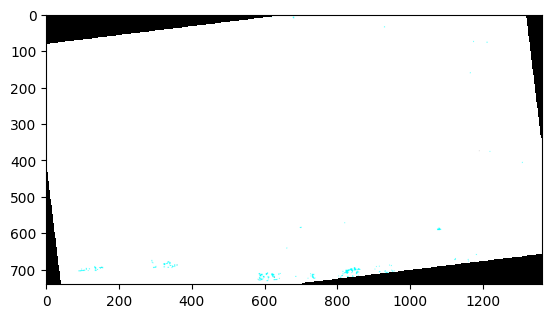

In [50]:
plt.imshow(gray_half_brovey)